In [37]:
# %conda install -c conda-forge numpy pandas seaborn scikit-learn scikit-surprise

# 데이터 로딩 및 분석


In [2]:
from surprise import Dataset
from surprise import Reader

from collections import defaultdict
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv("data/movies.csv")
ratings = pd.read_csv("data/ratings.csv")

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
movie_ratings = pd.merge(movies, ratings, left_on='movieId', right_on='movieId')

In [7]:
movie_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [8]:
movies.shape

(9125, 3)

In [9]:
ratings.shape

(100004, 4)

In [10]:
movie_ratings.shape

(100004, 6)

데이터 분석

- 영화별 평점수: min, max, median, mean
- 가장 평점이 많은 영화 10개는?
- 영화별 평점 평균: min, max, median, mean
- 가장 평점이 높은 영화 10개는? (100개 이상 평점이 있는 영화중)


In [11]:
movie_ratings["movieId"].nunique() # 이말은 레이팅이 없는 영화가 존재하여 merge중 소실된것을 뜻함

9066

In [12]:
movie_rating_summary = movie_ratings[["movieId", "rating"]].groupby(["movieId"]).agg(["count", "median", "mean"])

In [13]:
movie_rating_summary.head()

rating                 
         count median      mean
movieId                        
1          247    4.0  3.872470
2          107    3.0  3.401869
3           59    3.0  3.161017
4           13    3.0  2.384615
5           56    3.0  3.267857

In [14]:
movie_rating_summary.columns

MultiIndex([('rating',  'count'),
            ('rating', 'median'),
            ('rating',   'mean')],
           )

In [15]:
movie_rating_summary.columns = ["count", "median", "mean"]

In [16]:
movie_rating_summary.sort_values("count", ascending=False).head(10)

,count,median,mean
movieId,,,
356,341,4.0,4.054252
296,324,4.5,4.256173
318,311,5.0,4.487138
593,304,4.0,4.138158
260,291,4.5,4.221649
480,274,4.0,3.706204
2571,259,4.5,4.183398
1,247,4.0,3.872470
527,244,4.5,4.303279


In [17]:
movie_rating_summary.sort_values("mean", ascending=False).head(10)

,count,median,mean
movieId,,,
163949,1,5.0,5.0
71180,1,5.0,5.0
51471,1,5.0,5.0
52617,1,5.0,5.0
53887,1,5.0,5.0
54251,1,5.0,5.0
54328,1,5.0,5.0
55555,1,5.0,5.0
56869,1,5.0,5.0


In [18]:
movie_rating_summary[movie_rating_summary["count"] > 100].sort_values("mean", ascending=False).head(10)

,count,median,mean
movieId,,,
858,200,5.00,4.487500
318,311,5.00,4.487138
1221,135,5.00,4.385185
50,201,4.50,4.370647
527,244,4.50,4.303279
1193,144,4.50,4.256944
608,224,4.50,4.256696
296,324,4.50,4.256173
2858,220,4.25,4.236364


/var/folders/qg/b8v1nh_d69760npt2k4xd1jc0000gn/T/ipykernel_80344/2798869909.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=movie_rating_summary['mean'], kde=True, color='r')


<Axes: xlabel='mean', ylabel='Density'>

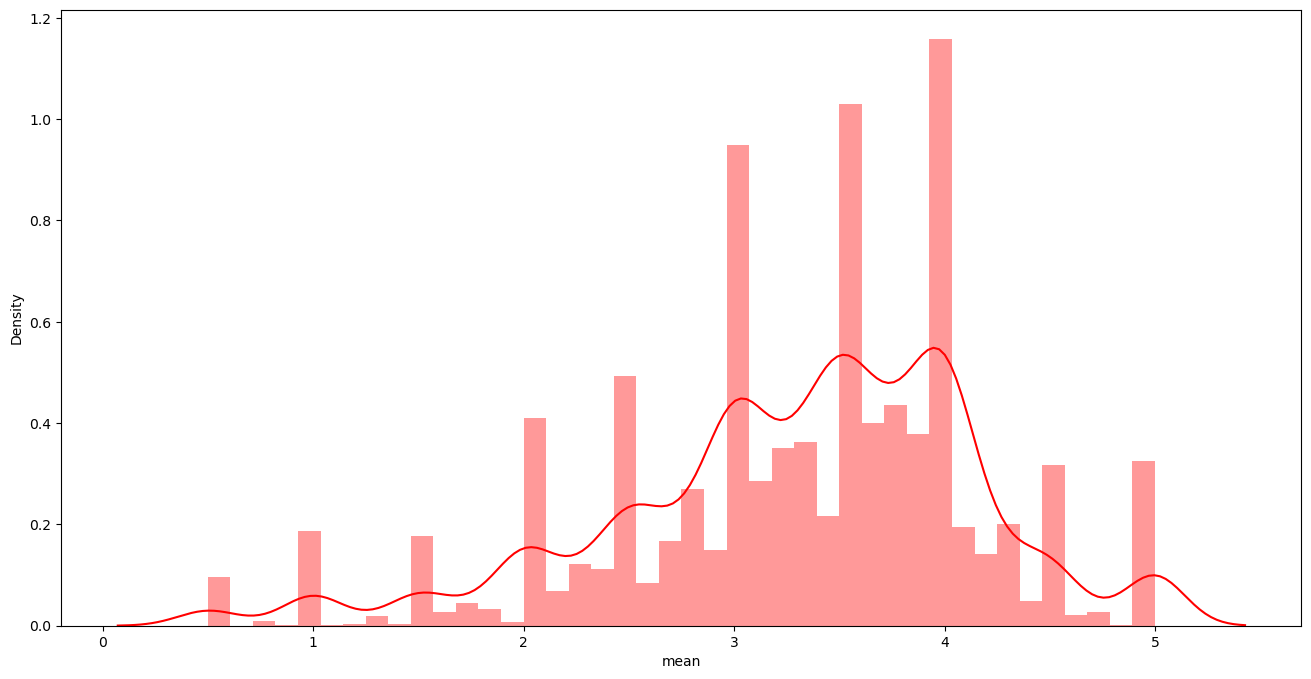

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8)) # 영역 잡기
sns.distplot(a=movie_rating_summary['mean'], kde=True, color='r')

/var/folders/qg/b8v1nh_d69760npt2k4xd1jc0000gn/T/ipykernel_80344/2922949232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=movie_rating_summary['count'], color='g')


<Axes: xlabel='count', ylabel='Density'>

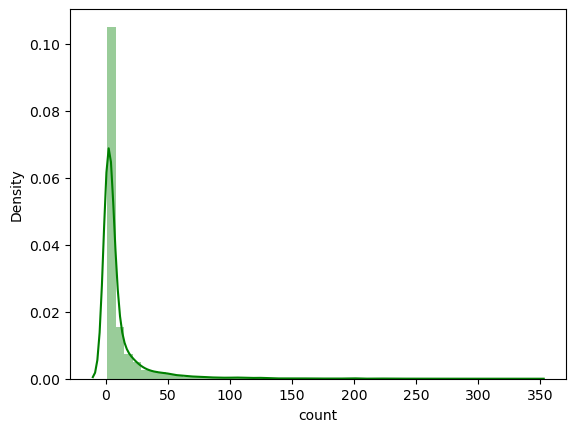

In [20]:
sns.distplot(a=movie_rating_summary['count'], color='g')

In [21]:
movie_ratings["userId"].nunique()

671

In [22]:
user_rating_summary = movie_ratings[["userId", "rating"]].groupby(["userId"]).agg(["count", "median", "mean"])

In [23]:
user_rating_summary.head()

rating                 
        count median      mean
userId                        
1          20    2.5  2.550000
2          76    3.0  3.486842
3          51    3.5  3.568627
4         204    5.0  4.348039
5         100    4.0  3.910000

In [24]:
user_rating_summary.columns = ["count", "median", "mean"]

In [25]:
user_rating_summary.sort_values("count", ascending=False).head(10)

,count,median,mean
userId,,,
547,2391,3.5,3.366792
564,1868,4.0,3.552463
624,1735,3.0,2.894236
15,1700,3.0,2.621765
73,1610,3.5,3.374224
452,1340,3.0,3.189179
468,1291,3.0,2.965918
380,1063,3.5,3.366416
311,1019,3.0,3.006379


In [26]:
user_rating_summary.sort_values("median", ascending=False).head(10)

,count,median,mean
userId,,,
230,94,5.0,4.473404
432,62,5.0,4.411290
622,31,5.0,4.725806
499,33,5.0,4.272727
145,38,5.0,4.500000
559,129,5.0,4.418605
473,76,5.0,4.315789
28,50,5.0,4.280000
556,25,5.0,4.400000


In [27]:
user_rating_summary.sort_values("median", ascending=True).head(10)

,count,median,mean
userId,,,
207,46,0.50,1.804348
581,49,0.50,1.459184
579,21,0.50,1.333333
609,140,1.00,1.985714
429,27,2.00,2.240741
315,55,2.00,2.454545
325,20,2.00,2.525000
35,20,2.25,2.400000
79,55,2.50,2.518182


/var/folders/qg/b8v1nh_d69760npt2k4xd1jc0000gn/T/ipykernel_80344/816334758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=user_rating_summary['mean'], kde=True, color='r')


<Axes: xlabel='mean', ylabel='Density'>

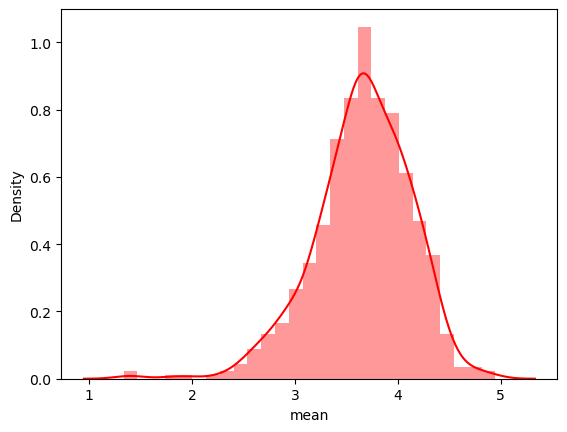

In [28]:
sns.distplot(a=user_rating_summary['mean'], kde=True, color='r')

/var/folders/qg/b8v1nh_d69760npt2k4xd1jc0000gn/T/ipykernel_80344/2208334410.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=user_rating_summary['count'], kde=True, color='r')


<Axes: xlabel='count', ylabel='Density'>

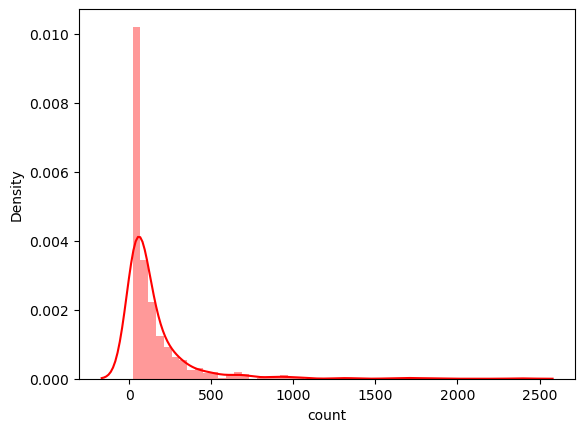

In [29]:
sns.distplot(a=user_rating_summary['count'], kde=True, color='r')

In [30]:
def getMovieName(movie_ratings, movieID):
    return movie_ratings[movie_ratings["movieId"] == movieID][["title", "genres"]].values[0]

def getMovieID(movie_ratings, movieName):
    return movie_ratings[movie_ratings["title"] == movieName][["movieId", "genres"]].values[0]

## 영화 데이터를 surprise 모듈을 통해 로딩


In [31]:
# !wget "https://grepp-reco-test.s3.ap-northeast-2.amazonaws.com/movielens/ratings.csv"

In [32]:
# Surprise에 맞는 형식으로 사용하기위해 csv 파일내 데이터를 해당 모듈에 맞는 형식으로 명명
# 첫번쨰 라인은 헤더니까 무시하라고 함
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file("data/ratings.csv", reader=reader)

In [33]:
from surprise import KNNBasic
import heapq
from collections import defaultdict

In [34]:
trainSet = data.build_full_trainset() # surprise가 메모리로 로딩한데이터를 모두다 트레이닝셋으로 써라, 모델 기반할땐 테스트로 나눔

In [35]:
# 유사도 로직 설정
sim_options = {
    'name': 'cosine',
    'user_based': True
}

model = KNNBasic(sim_options=sim_options)
model.fit(trainSet)
simsMatrix = model.compute_similarities() # 사용자간 코사인 유사도 생성

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [36]:
testUser = '85' # 추천하고자 하는 유저 아이디
k = 10

# 주어진 사용자와 가장 흡사한 사용자 N을 찾는다

testUserInnerID = trainSet.to_inner_uid(testUser)# 먼저 이를 Surprise 내부 ID로 변환
print(testUserInnerID)
# 이 사용자에 해당하는 레코드를 읽어온다
similarityRow = simsMatrix[testUserInnerID]

84


In [37]:
similarityRow.shape

(671,)

In [38]:
# users에 모든 사용자들을 일련번호와 유사도를 갖는 튜플의 형태로 저장
# 이 때 본인은 제외
users = []
for innerID, score in enumerate(similarityRow):
    if (innerID != testUserInnerID):
        users.append( (innerID, score) )
users

[(0, 0.0),
 (1, 0.9317437101818368),
 (2, 0.9462368828208907),
 (3, 0.9540317361976572),
 (4, 0.9653265298427278),
 (5, 0.9401267913629436),
 (6, 0.9400416732995409),
 (7, 0.9617144342731783),
 (8, 0.8569867148959759),
 (9, 0.9994838709333602),
 (10, 1.0),
 (11, 1.0),
 (12, 0.9378700239028726),
 (13, 1.0),
 (14, 0.9019531874292673),
 (15, 0.9191450300180578),
 (16, 0.8677956432513021),
 (17, 0.9823974175160344),
 (18, 0.907534543902125),
 (19, 0.8874250130080685),
 (20, 0.9461389844312209),
 (21, 0.9350354811229232),
 (22, 0.9434894296825902),
 (23, 0.9819388074905946),
 (24, 1.0),
 (25, 0.9222213677773493),
 (26, 0.9082682792306083),
 (27, 0.8547043234472846),
 (28, 0.0),
 (29, 0.9303425112253353),
 (30, 0.9128709291752768),
 (31, 0.9563015167404944),
 (32, 0.9384996000012742),
 (33, 0.9625265270969021),
 (34, 0.8),
 (35, 0.9133714890249096),
 (36, 1.0),
 (37, 0.9702345438513523),
 (38, 0.9754804241786637),
 (39, 0.0),
 (40, 0.9676724936112584),
 (41, 0.9703085034952702),
 (42, 0.8965

In [39]:
# 이제 users 리트스에서 유사도 값을 기준으로 가장 큰 k개를 찾는다
kNeighbors = heapq.nlargest(k, users, key=lambda t: t[1])

In [40]:
kNeighbors

[(10, 1.0),
 (11, 1.0),
 (13, 1.0),
 (24, 1.0),
 (36, 1.0),
 (44, 1.0),
 (45, 1.0),
 (51, 1.0),
 (53, 1.0),
 (61, 1.0)]

In [41]:
# 이제 유사 사용자들을 하나씩 보면서 그들이 평가한 아이템들별로 원 사용자와 유사 사용자간의 유사도를 가중치로 준 평점을 누적한다

# candidates에는 아이템별로 점수를 누적한다. 유사사용자(u')의 평점 * 사용자(u)와 유사 사용자(u')의 유사도
candidates = defaultdict(float)

# 이 K명의 최고 유사 사용자를 한명씩 루프를 돌면서 살펴본다

for similarUser in kNeighbors: # kNeighbors (innerID, userSimilarityScore)
    # similarUser는 앞서 enumerate로 만든 그 포맷임 - (내부ID, 유사도값)
    innerID = similarUser[0]
    userSimilarityScore = similarUser[1]

    # innerID에 해당하는 사용자의 아이템과 평점 정보를 읽어온다.
    # theirRatings는 (아이템ID, 평점)의 리스트임
    theirRatings = trainSet.ur[innerID]  
    # innerID가 평가한 모든 아이템 리스트를 하나씩 보면서
    
    for rating in theirRatings: # theirRatings list of (movieID, Rating)
        #rating (movieID, Rating)
        candidates[rating[0]] += (rating[1]) * userSimilarityScore # 아이템ID별로 평점 정보를 합산하되 사용자와의 유사도값을 가중치로 준다
        

In [42]:
# 사용자가 이미 평가한 아이템들을 제거할 사전을 만든다
watched = {}
for itemID, rating in trainSet.ur[testUserInnerID]:
    watched[itemID] = 1

In [43]:
# 앞서 candidates에서 합산된 스코어를 기준으로 내림차순으로 소팅한 후
# 사용자(u)가 아직 못본 아이템인 경우 추천한다
pos = 0
for itemID, ratingSum in sorted(candidates.items(), key=lambda k: k[1], reverse=True):
    if not itemID in watched:
        movieID = trainSet.to_raw_iid(itemID)
        print(movieID, getMovieName(movie_ratings, int(movieID)), ratingSum)
        pos += 1
        if (pos > 10):
            break

79132 ['Inception (2010)' 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'] 16.5
1196 ['Star Wars: Episode V - The Empire Strikes Back (1980)'
 'Action|Adventure|Sci-Fi'] 12.0
26614 ['Bourne Identity, The (1988)' 'Action|Adventure|Drama|Mystery|Thriller'] 10.0
3996 ['Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)'
 'Action|Drama|Romance'] 10.0
58559 ['Dark Knight, The (2008)' 'Action|Crime|Drama|IMAX'] 10.0
1201 ['Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)'
 'Action|Adventure|Western'] 9.5
48516 ['Departed, The (2006)' 'Crime|Drama|Thriller'] 9.5
91529 ['Dark Knight Rises, The (2012)' 'Action|Adventure|Crime|IMAX'] 9.5
1270 ['Back to the Future (1985)' 'Adventure|Comedy|Sci-Fi'] 9.5
104841 ['Gravity (2013)' 'Action|Sci-Fi|IMAX'] 9.0
2959 ['Fight Club (1999)' 'Action|Crime|Drama|Thriller'] 9.0


In [44]:
def recommendForUser(userID):
    testUserInnerID = trainSet.to_inner_uid(userID)
    similarityRow = simsMatrix[testUserInnerID]

    users = []
    for innerID, score in enumerate(similarityRow):
        if (innerID != testUserInnerID):
            users.append( (innerID, score) )

    kNeighbors = heapq.nlargest(k, users, key=lambda t: t[1])

    candidates = defaultdict(float)
    for similarUser in kNeighbors:
        innerID = similarUser[0]
        userSimilarityScore = similarUser[1]
        theirRatings = trainSet.ur[innerID]
        for rating in theirRatings:
            candidates[rating[0]] += (rating[1]) * userSimilarityScore

    watched = {}
    for itemID, rating in trainSet.ur[testUserInnerID]:
        watched[itemID] = 1

    pos = 0
    for itemID, ratingSum in sorted(candidates.items(), key=lambda k: k[1], reverse=True):
        if not itemID in watched:
            movieID = trainSet.to_raw_iid(itemID)
            print(movieID, getMovieName(movie_ratings, int(movieID)), ratingSum)
            pos += 1
            if (pos > 10):
                break

In [45]:
recommendForUser('85')

79132 ['Inception (2010)' 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'] 16.5
1196 ['Star Wars: Episode V - The Empire Strikes Back (1980)'
 'Action|Adventure|Sci-Fi'] 12.0
26614 ['Bourne Identity, The (1988)' 'Action|Adventure|Drama|Mystery|Thriller'] 10.0
3996 ['Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)'
 'Action|Drama|Romance'] 10.0
58559 ['Dark Knight, The (2008)' 'Action|Crime|Drama|IMAX'] 10.0
1201 ['Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)'
 'Action|Adventure|Western'] 9.5
48516 ['Departed, The (2006)' 'Crime|Drama|Thriller'] 9.5
91529 ['Dark Knight Rises, The (2012)' 'Action|Adventure|Crime|IMAX'] 9.5
1270 ['Back to the Future (1985)' 'Adventure|Comedy|Sci-Fi'] 9.5
104841 ['Gravity (2013)' 'Action|Sci-Fi|IMAX'] 9.0
2959 ['Fight Club (1999)' 'Action|Crime|Drama|Thriller'] 9.0


## 한방에 정리


In [137]:
from surprise import Dataset, Reader
from collections import defaultdict
import numpy as np
import pandas as pd
from surprise import KNNBasic
import heapq


def getMovieName(movie_ratings, movieID):
    return movie_ratings[movie_ratings["movieId"] == movieID][["title", "genres"]].values[0]

def getMovieID(movie_ratings, movieName):
    return movie_ratings[movie_ratings["title"] == movieName][["movieId", "genres"]].values[0]

# 데이터 로드 및 병합
movies = pd.read_csv("data/movies.csv")
ratings = pd.read_csv("data/ratings.csv")
movie_ratings = pd.merge(movies, ratings, left_on='movieId', right_on='movieId')

# Surprise 라이브러리 형식에 맞게 데이터 로딩
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file("data/ratings.csv", reader=reader)

# 전체 데이터를 트레이닝 세트로 사용
trainSet = data.build_full_trainset() 

# 유사도 계산 방식 설정
sim_options = {
    'name': 'cosine',  # 유사도 측정 방식: 코사인 유사도
    'user_based': True # 사용자 기반 협업 필터링 사용 (False로 설정 시 아이템 기반 필터링)
}

# KNN 알고리즘으로 모델 생성 및 학습
model = KNNBasic(sim_options=sim_options)
model.fit(trainSet)

# 사용자 간 유사도 매트릭스 계산
simsMatrix = model.compute_similarities()

# 추천할 사용자와 이웃 설정
testUser = '85'  # 추천을 받을 사용자 ID
k = 10  # 고려할 이웃(유사 사용자) 수

# Surprise의 내부 ID로 사용자 ID 변환
# Surprise는 데이터셋을 로딩하면서 내부에서 사용자와 아이템 ID를 0부터 순서대로 일련번호를 부여함
# 이를 내부 ID라고 하며, trainSet.to_inner_uid() 메서드를 통해 raw ID를 내부 ID로 변환
testUserInnerID = trainSet.to_inner_uid(testUser)
print(testUserInnerID)

# 추천할 사용자의 유사도 행을 추출
# simsMatrix는 사용자의 내부 ID에 대한 유사도 값을 행렬로 저장
# testUserInnerID에 해당하는 사용자의 유사도 행을 similarityRow로 저장
similarityRow = simsMatrix[testUserInnerID]

# 다른 모든 사용자와의 유사도 값 리스트 생성 (본인 제외)
# (사용자 내부 ID, 유사도 점수) 형태의 튜플로 리스트 생성
users = []
for innerID, score in enumerate(similarityRow):
    if innerID != testUserInnerID:  # 본인은 제외
        users.append((innerID, score))

# 유사도 값 기준 상위 k개의 유사 사용자를 kNeighbors에 저장
kNeighbors = heapq.nlargest(k, users, key=lambda t: t[1])

# 유사 사용자들이 평가한 아이템의 평점을 가중합으로 저장할 딕셔너리 생성
# 유사 사용자와의 유사도를 가중치로 사용
candidates = defaultdict(float)

# 유사 사용자들의 평점 데이터 누적
for similarUser in kNeighbors:  # kNeighbors는 (내부ID, 유사도 점수) 형식
    innerID = similarUser[0]
    userSimilarityScore = similarUser[1]

    # 유사 사용자가 평가한 아이템과 평점 리스트 가져오기
    # trainSet.ur는 내부 ID를 사용하여 각 사용자가 평가한 (아이템 ID, 평점) 리스트를 반환
    theirRatings = trainSet.ur[innerID]

    # 각 아이템에 대해, 유사도 점수를 가중치로 하여 평점을 누적
    for rating in theirRatings:  # rating은 (아이템 ID, 평점) 형식의 튜플
        candidates[rating[0]] += rating[1] * userSimilarityScore

# 이미 평가한 아이템을 제외하기 위한 사전 생성
watched = {}
for itemID, rating in trainSet.ur[testUserInnerID]:
    watched[itemID] = 1

# 추천 아이템 출력
# candidates에서 평점이 높은 순으로 소팅하여, 아직 보지 않은 아이템을 추천
pos = 0
for itemID, ratingSum in sorted(candidates.items(), key=lambda k: k[1], reverse=True):
    if itemID not in watched:  # 이미 평가한 아이템은 제외
        movieID = trainSet.to_raw_iid(itemID)  # 내부 아이템 ID를 원래 ID로 변환
        print(movieID, getMovieName(movie_ratings, int(movieID)), ratingSum)
        pos += 1
        if pos > 10:
            break


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
84
79132 ['Inception (2010)' 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'] 16.5
1196 ['Star Wars: Episode V - The Empire Strikes Back (1980)'
 'Action|Adventure|Sci-Fi'] 12.0
26614 ['Bourne Identity, The (1988)' 'Action|Adventure|Drama|Mystery|Thriller'] 10.0
3996 ['Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)'
 'Action|Drama|Romance'] 10.0
58559 ['Dark Knight, The (2008)' 'Action|Crime|Drama|IMAX'] 10.0
1201 ['Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)'
 'Action|Adventure|Western'] 9.5
48516 ['Departed, The (2006)' 'Crime|Drama|Thriller'] 9.5
91529 ['Dark Knight Rises, The (2012)' 'Action|Adventure|Crime|IMAX'] 9.5
1270 ['Back to the Future (1985)' 'Adventure|Comedy|Sci-Fi'] 9.5
104841 ['Gravity (2013)' 'Action|Sci-Fi|IMAX'] 9.0
2959 ['Fight Club (1999)' 'Action|Crime|Drama|Thriller'] 9.0
